In [2]:
import sklearn.datasets as skd

In [12]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [46]:
skd.load_breast_cancer   #explore available datasets on sklearn.  I first chose the species_distributions dataset, but not too sure what to do with it.  Chose breast cancer data instead for classification.

<function sklearn.datasets._base.load_breast_cancer>

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
df = load_breast_cancer()   #Create instance of dataset to actually use it.

In [50]:
type(df)

sklearn.utils.Bunch

In [51]:
# note: data is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [52]:
print(df.data.shape)
print(df.target.shape)
print(df.feature_names.shape)


(569, 30)
(569,)
(30,)


In [53]:
df.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [54]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [58]:
df.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
# split df into train and test sets 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25)
N, D = X_train.shape


In [60]:
#Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
#Train data/fit to model!

import tensorflow as tf

model = tf.keras.models.Sequential([    #build a model of type Sequential
  tf.keras.layers.Input(shape=(D,)),    #takes input of shape D and does a linear transformation to get an output of size 1 --> Shape D to shape of 1.
  tf.keras.layers.Dense(1, activation='sigmoid')   #we want to use the sigmoid activation function so outputs are between 0 and 1.  Will round outputs to produce 0 (benign) and 1 (cancerous) later.
])

# Alternatively:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))  #Can just instantiate the Sequential model and then add the Dense layer.

model.compile(optimizer='adam',  #the optimizer is the gradient descent algo you want to use.  Adam is a generic but effective algo.
              loss='binary_crossentropy',  #specify the loss function
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 0s 11ms/step - loss: 0.6753 - accuracy: 0.6549 - val_loss: 0.7935 - val_accuracy: 0.6084
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6003 - accuracy: 0.7183 - val_loss: 0.7106 - val_accuracy: 0.6294
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7535 - val_loss: 0.6403 - val_accuracy: 0.6643
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7840 - val_loss: 0.5794 - val_accuracy: 0.7343
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8216 - val_loss: 0.5273 - val_accuracy: 0.7692
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8357 - val_loss: 0.4845 - val_accuracy: 0.7832
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8638 - val_loss: 0.4485 - val_accuracy: 0.7972
Epoch 8/100


In [ ]:
#retuns about a 98% accuracy on training and test data.

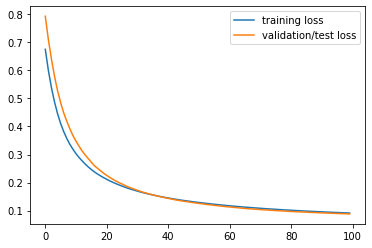

In [67]:
#Plotting loss per epoch iteration.  Loss decreases with each iteration.  Drastically decreasing first and then leveling off. Fitting data is essentially a loop running gradient descent.
#Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='training loss')
plt.plot(r.history['val_loss'], label='validation/test loss')
plt.legend()

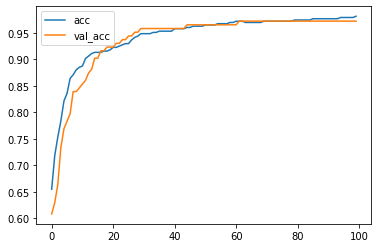

In [65]:
# Plot the accuracy too.  Essentially shows the same as above.  Accuracy greatly increases with first several iterations and then slowly levels off.
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Time to make predictions using the trained model

In [68]:
#Run predictions of X_test


In [73]:
# Make predictions
P = model.predict(X_test)
print(pd.DataFrame(P)) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

            0
0    0.955806
1    0.961169
2    0.000054
3    0.000001
4    0.773281
..        ...
138  0.977444
139  0.000195
140  0.818818
141  0.999966
142  0.982904

[143 rows x 1 columns]


In [74]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
#Flattening 2D array to 1D array
P = np.round(P).flatten()
print(P)

[1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.]


In [72]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.972027972027972
5/5 [==============================] - 0s 1ms/step - loss: 0.0880 - accuracy: 0.9720
Evaluate output: [0.08798202872276306, 0.9720279574394226]


In [ ]:
#Save model to run on new data:
# model.save('simplelinearclassifier_CancerPredictions.h5')